In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('No2 dataset.csv')

In [ ]:
data.head()

,Date_Time,NO2(GT)
0,10/03/2004 18.00.00,166
1,10/03/2004 19.00.00,1174
2,10/03/2004 20.00.00,131
3,10/03/2004 21.00.00,172
4,10/03/2004 22.00.00,131


In [ ]:
data.dtypes

Date_Time    object
NO2(GT)       int64
dtype: object

In [ ]:
data['Date_Time'].dtypes

dtype('O')

In [ ]:
data['Date_Time'].max() , data['Date_Time'].min()

('31/08/2004 23.00.00', '01/04/2004 00.00.00')

#Coverting to the specific format

In [ ]:
data['Date_Time']= pd.to_datetime(data['Date_Time'] , format='%d/%m/%Y %H.%M.%S')

In [ ]:
data['Date_Time'].dtypes


dtype('<M8[ns]')

In [ ]:
data['Date_Time'].max() , data['Date_Time'].min()

(Timestamp('2004-09-24 02:00:00'), Timestamp('2004-03-10 18:00:00'))

#Extract hour and minute

In [ ]:
data['Date_Time'].dt.hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Date_Time, dtype: int64

In [ ]:
data['Date_Time'].dt.minute.head()

0    0
1    0
2    0
3    0
4    0
Name: Date_Time, dtype: int64

#The day of week - Monday (0) to Sunday (6)

In [ ]:
data['Date_Time'].dt.dayofweek.head()

0    2
1    2
2    2
3    2
4    2
Name: Date_Time, dtype: int64

#Extracting month

In [ ]:
data['Date_Time'].dt.month.head()

0    3
1    3
2    3
3    3
4    3
Name: Date_Time, dtype: int64

In [ ]:
#Checking the monthend
data['Date_Time'].dt.is_month_end.head()

0    False
1    False
2    False
3    False
4    False
Name: Date_Time, dtype: bool

#Putting all togather

In [ ]:
new_df = pd.DataFrame({
    'year':data['Date_Time'].dt.year,
    'month':data['Date_Time'].dt.month,
    'days':data['Date_Time'].dt.day,
    'hour':data['Date_Time'].dt.hour,
    'minute':data['Date_Time'].dt.minute,
    'dayofweek':data['Date_Time'].dt.dayofweek
    
})

In [ ]:
new_df.head()

,year,month,days,hour,minute,dayofweek
0,2004,3,10,18,0,2
1,2004,3,10,19,0,2
2,2004,3,10,20,0,2
3,2004,3,10,21,0,2
4,2004,3,10,22,0,2


In [ ]:
complete_data = pd.concat([data , new_df], axis=1)

In [ ]:
complete_data.head()

,Date_Time,NO2(GT),year,month,days,hour,minute,dayofweek
0,2004-03-10 18:00:00,166,2004,3,10,18,0,2
1,2004-03-10 19:00:00,1174,2004,3,10,19,0,2
2,2004-03-10 20:00:00,131,2004,3,10,20,0,2
3,2004-03-10 21:00:00,172,2004,3,10,21,0,2
4,2004-03-10 22:00:00,131,2004,3,10,22,0,2


In [ ]:
complete_data['is_weekday']=0
for i in range(0 , len(complete_data)):
  if complete_data['dayofweek'][i]==5 | complete_data['dayofweek'][i]==6:
    complete_data['is_weekday'][i]=0
  else:  
    complete_data['is_weekday'][i]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
complete_data['Date_Time'][complete_data['is_weekday']==0]

Series([], Name: Date_Time, dtype: datetime64[ns])

#Difference between Dates

In [ ]:
df = pd.read_csv('agent_classification.csv')

In [ ]:
df.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [ ]:
df[['Application_Receipt_Date' ,'Applicant_BirthDate']].head()

,Application_Receipt_Date,Applicant_BirthDate
0,4/16/2007,12/19/1971
1,4/16/2007,2/17/1983
2,4/16/2007,1/16/1966
3,4/16/2007,2/3/1988
4,4/16/2007,7/4/1985


In [ ]:
df['Applicant_BirthDate'] = pd.to_datetime(df['Applicant_BirthDate'] , format='%m/%d/%Y')

In [ ]:
df['Application_Receipt_Date'] = pd.to_datetime(df['Application_Receipt_Date'] , format='%m/%d/%Y')

In [ ]:
 (df['Application_Receipt_Date'][0] - df['Applicant_BirthDate'][0]).days/365

35.347945205479455

In [ ]:
df['Applicant_Age'] = df.apply(lambda x: (x['Application_Receipt_Date'] - x['Applicant_BirthDate']).days/365 , axis=1)

In [ ]:
df['Applicant_Age'].head()

0    35.347945
1    24.175342
2    41.273973
3    19.210959
4    21.797260
Name: Applicant_Age, dtype: float64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


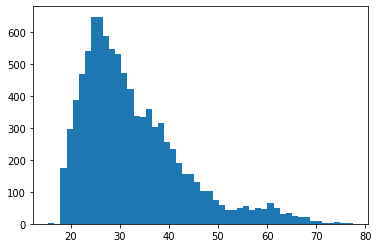

In [ ]:
plt.hist(df['Applicant_Age'] , bins=50)
plt.show()